
# HDip Data Analytics numpy.random project

The **numpy.random** function, part of the numpy software package, generates **pseudo** random numbers. An initial value, the **seed**, determines the output produced by the algorithm. For any given seed the  same 'random' output will be produced, hence the term 'pseudo'. Without knowing the seed it will be difficult for an observer to predict the output. A truly random generator would always produce an unpredictable outcome - this could be, for example, by measuring the value of a physical entity, such as the level of background radiation. There are many applications however where a pseudo random output is adequate, or indeed desirable. One instance is the encryption and decryption of data, required for many purposes. In order to decrypt data, the application receiving the encrypted data simply needs the same seed(s) value(s) that was used to generate the encryption key.   

The list of commands, and syntax for them, are taken from the numpy.random documentation at :  
https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html

Work through the cells in this notebook sequentially to demonstrate features of **numpy.random**, starting with the simple options (the use of 'seed' is shown later in the notebook).


## Part 1 - Simple random data functions

The first option we'll examine is **rand**. This uses a uniform distribution to select numbers from the range `[0,1)`, that is, inclusive of 0 but exclusive of 1. This distribution is displayed in systems where the likelihood of each possible outcome is approximately equal, for example when spinning a roulette wheel. Other than for the 'bytes' option, described below, all of the following simple functions produce outputs that are (potentially) multi-dimensional arrays. For 'rand' the syntax is :  
**rand(s1, s2, .. ,sn)** , where 'sx' is the number of elements in that dimension of the array.  
(ref https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html)  
For example, rand(5) produces a one dimensional array containing 5 entries. rand(2,4) would give a 2D array (a matrix) of size 2x4, eg:

In [50]:
# Import the numpy package
import numpy as np
print(np.random.rand(5))
print(np.random.rand(2,4))

[0.62062357 0.89125115 0.39652321 0.47702433 0.66643185]
[[0.7988929  0.33014746 0.59989855 0.03045886]
 [0.67245112 0.27421796 0.47789993 0.03057238]]


When describing the remainder of the simple functions one dimensional arrays will be used, as having multi-dimensional arrays confuses the outputs somewhat, where the interests of the descriptions lie principally in the types of data in individual elements, and their distributions (which are unaffected by the number of dimensions).

To illustrate the distribution of numbers generated by 'rand' we'll use a histogram plot of 1000 values :

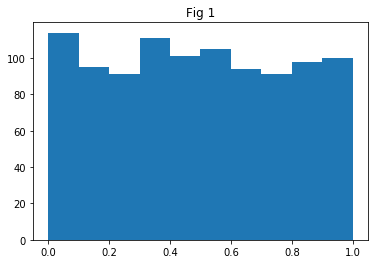

In [51]:
import matplotlib.pyplot as plt
x=np.random.rand(1000)
plt.hist(x)
plt.title("Fig 1")
plt.show()

Next, consider the **randn** function. Syntax : random.randn(s1, s2, .. ,sn)  - as for **rand** above.  
This outputs an array of numbers from the Normal distribution, with mean 0 and variance 1. This type of distribution might be expected in many situations where data are more likely to be clumped around a central mean value, such as the height of all adult males or females in a country.  
An example of using this function might be to test how closely the values of the measurement of a particular aspect of a population match that of a random Normal Distribution (so that appropriate statistical analysis can then be carried out).  
The output from 'randn' is best illustrated using a plot - see Fig 2 below for an output of 1000 values generated by the function:

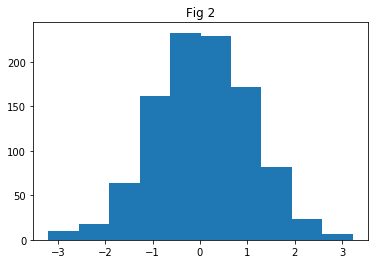

In [8]:
x=np.random.randn(1000)
plt.hist(x)
plt.title("Fig 2")
plt.show()

For small population samples an obvious distribution pattern may be much less evident - take the randn function with just 15 values :

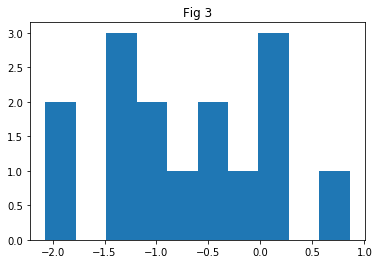

In [9]:
x=np.random.randn(15)
plt.hist(x)
plt.title("Fig 3")
plt.show()

The **randint** function produces a random integer output, based on a discrete (a finite number of values to choose from), uniform distribution.  
Syntax : random.randint(low `[,high] [,size] [,dtype]`)  
The output is a random sample of integers in the range `[low,high)`, or if 'high' is not specified in the range `[0,low)`. 'size' is the number of elements in the output array, eg size=5 or size=(2,4,6), and 'dtype' is the type of integers returned (in terms of the number of bits they contain), with possible values int8, int16, int32 and int64 (the default).  
A selection generated by randint might be useful, for example, in choosing people for jury service - assign every eligible person in the population an integer, then select 12 of them at random, eg:

In [10]:
x=np.random.randint(0,high=3000000,size=12)
print(x)

[1108838 1339708 1964320   65243 2886993 1149530 1887729 2680497 2322098
  244800  575340  202015]


An example of the impact on the output of using randint can be seen by running the following command :

In [11]:
x=np.random.randint(-10,high=128,size=12,dtype='int8')
print(x)

[111  92   0  47  92  49 121  66  95  76  -8  87]


The values that can be held by an 'int8' integer only range from -128 to 127, consequently all elements in the output will be in this range. If a 'low' or a 'high' value outside this range is specified, an error is generated.

The function **random.random_integers** is the same as 'randint', apart from not having a 'dtype' option, and the 'high' value being inclusive rather than exclusive. eg:

In [12]:
x=np.random.randint(1,high=3,size=10)
print(x)
x=np.random.random_integers(1,high=3,size=10)
print(x)

[2 2 2 1 2 2 1 1 1 1]
[3 3 2 1 1 1 3 3 2 1]


C:\Users\dingl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 3 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


Four functions, **random_sample**, **random**, **ranf** and **sample** are all aliases, providing a selection of floating point number outputs in the range `[0,1)`, with a parameter defining the number of elements to return. They are basically the same as **rand**, with just a slightly different syntax for expressing the array size.  
Syntax eg: random.random(size)  where 'size' is the array size, eg 5  or (2,1,9,10)  
(ref https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions)  
(ref https://stackoverflow.com/questions/47231852/np-random-rand-vs-np-random-random)

eg: 

In [13]:
x=np.random.random(10)
print(x)
x=np.random.sample(5)
print(x)

[0.40160267 0.59281562 0.66939021 0.41343466 0.49529626 0.90453455
 0.61042399 0.40818587 0.84203661 0.20304378]
[0.08772043 0.94840441 0.68936106 0.4610978  0.59829181]


**random.bytes** returns a random list of ASCII (American Standard Code for Information Interchange) byte values, preceeded by 'b' and enclosed in single quotes. Printable characters are displayed in their usual form, with unprintable ones being depicted using '\x' followed by a two character hex value as defined by the ASCII table of characters (shown in http://www.asciitable.com) For example: '\x1B' is 'Escape'. This provides for a random selection from 255 characters, rather than the 10 numeric characters for other options, and might perhaps be useful in generating keys for encrypting data.   
Syntax : random.bytes(number-of-bytes)  (output is a one dimensional array)  
An example creating 3 random bytes is:

In [14]:
x=np.random.bytes(3)
print(x)

b'\x7fM`'


The final simple random function is **choice**. This generates a random sample from an input array, with the option of specifying a probability for each element of the array to be selected, and also whether or not each element in the array can be selected more than once (the option 'replace').   
Such a function might be used, for example, to select random questions from a bank of questions to ask in an exam.  
The syntax for this option is :   
random.choice(array `[,size]` `[,replace={True/False}]` `[,p=[p1,p1,..,pn]]`  
'array' can be specified simply as an integer, in which case it is treated as a range of integers, from 0 to the (specified value - 1).
For example.

In [15]:
x=np.random.choice(5,10)
print(x)

[1 4 3 0 2 3 2 0 1 4]


This selects 10 random samples from the range `[0,5)`  
If we tried to use 'replace=False' an error would occur, as the 'size' parameter is greater than the number of elements in the array : 

In [16]:
x=np.random.choice(3,10,replace=False)
print(x)

ValueError: Cannot take a larger sample than population when 'replace=False'

If 'size' is now set to the number of elements in the array, each one will be returned once :

In [17]:
x=np.random.choice(5,5,replace=False)
print(x)

[2 4 0 3 1]


An example of using 'choice' on an input array of strings is:

In [18]:
instring=['apple','pear','banana','grape','orange','lemon','lime','strawberry']
x=np.random.choice(instring,6,replace=True)
print(x)

['grape' 'orange' 'strawberry' 'orange' 'orange' 'lemon']


With 'replace=True' each element in the array can be selected more than once.  
Finally, include the probability of selecting each element - the number of elements in the array of probabilities should match the number of elements in the array being selected from; the position of each element in the array being selected from is matched with the probability in the same position in the array of probabilities, eg

In [19]:
instring=['apple','pear','banana','grape','orange','lemon','lime','strawberry']
x=np.random.choice(instring,12,replace=True,p=[0.05,0.5,0.1,0.2,0.05,0.1,0,0])
print(x)

['pear' 'pear' 'lemon' 'apple' 'lemon' 'lemon' 'pear' 'banana' 'lemon'
 'pear' 'pear' 'grape']


Lime and strawberry will never be selected, as they have a probability of 0 assigned them. Overall pear should be most often chosen, with a probability of 0.5, and grape should be next most common.

## Part 2 Permutation functions

There are two permutation functions, 'shuffle' and 'permutation'.  
First, **shuffle** :

This function shuffles the elements of an array - it does not add or remove anything from the array.
For a multi-dimensional array the order of sub-arrays is shuffled, but not the contents - eg, for a matrix the row order would change but not the values in each row.  
Syntax : random.shuffle(array)   where 'array' is the target array.  
eg:

In [20]:
x=[1,2,3,4,5]
np.random.shuffle(x)
print(x)

[1, 3, 2, 5, 4]


Now shuffle the contents of a matrix - 
(ref https://stackoverflow.com/questions/6667201/how-to-define-a-two-dimensional-array-in-python)

In [21]:
x=np.matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
np.random.shuffle(x)
print(x)

[[7 8 9]
 [1 2 3]
 [4 5 6]]


(ref https://stackoverflow.com/questions/1514553/how-to-declare-an-array-in-python)

In [22]:
from array import array
intarray = array('i')

In [23]:
array = [[ ['1' for col in range(3)] for col in range(3)] for row in range(3)]
print(array)


[[['1', '1', '1'], ['1', '1', '1'], ['1', '1', '1']], [['1', '1', '1'], ['1', '1', '1'], ['1', '1', '1']], [['1', '1', '1'], ['1', '1', '1'], ['1', '1', '1']]]


In [24]:
x=np.ndarray(shape=(2,3,4), dtype=int, order='F')
x[0,0,0]=1
x[0,1,1]=2
x[0,2,2]=3
print(x)
print("-------------------")
np.random.shuffle(x)
print(x)

[[[1 0 1 1]
  [1 2 2 1]
  [5 5 3 3]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
-------------------
[[[1 0 1 1]
  [1 2 2 1]
  [5 5 3 3]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


The **permutation** function.  
Syntax : random.permutation(x) where 'x' is an int or an array
If 'x' is an int then a permutation is returned of a range of integers from 0 to (x-1), eg:

In [25]:
print(np.random.permutation(5))

[1 3 0 4 2]


Note how a shuffled list of the numbers from 0 to 4 (= 5-1) is returned.
For an array, a new array is returned that is a shuffled copy of the original, eg:

In [26]:
x=[1,2,3,4,5]
y=np.random.permutation(x)
print(x)
print(y)

[1, 2, 3, 4, 5]
[2 4 3 1 5]


Note how the original array 'x' is left unchanged, unlike for **shuffle**

## Part 3 Description of a selection of Distribution functions

**1. Normal** (or Gaussian) distributions are frequently used to analyse natural and social based phenomena (ref https://en.wikipedia.org/wiki/Normal_distribution), where the values of variables are clustered around a central peak, and tail off equally above and below that peak.  
(ref https://statisticsbyjim.com/basics/normal-distribution/)  
Two parameters define the shape of plots for Normal distributions - the mean (average) and standard deviation (how spread out values are from the mean).  
The mean is calculated as :  $\mu=\frac{\sum_{i=1}^N x_i}{N}$ for 'N' values of variable 'x'   
The Standard Deviation as :  $\sigma=(\frac{1}{N}\sum_{i=1}^N (x_i-\mu)^2)^\frac{1}{2}$  
(ref https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/)  

An example of the use of this might be a shoe shop manager deciding how many of each size of shoe to order - they could get data from a random selection of customers - work out the mean and standard deviation for male and female customers, and make their order based on the assumption that foot size is normally distributed for each gender in the population of customers. 

Fig 4 illustrates examples of three density plots (a line of best-fit for the discrete values) of Normally distributed random variables, using the random.normal function, with differing means and standard deviations :   
(ref https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)  
(ref https://seaborn.pydata.org/tutorial/distributions.html)  
(ref https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib)

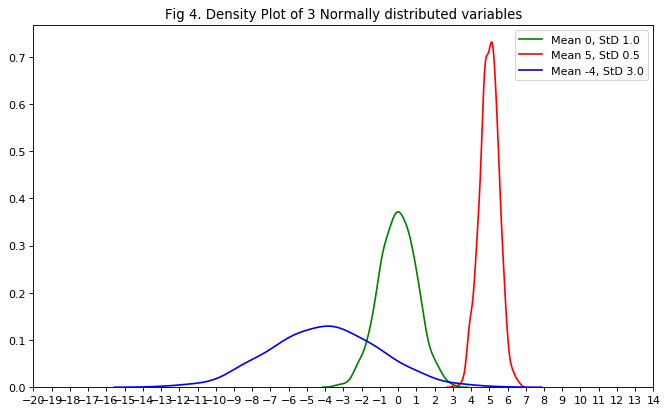

In [23]:
import seaborn as sns
x=np.random.normal(loc=0.0, scale=1.0, size=1000)
y=np.random.normal(loc=5.0, scale=0.5, size=1000)
z=np.random.normal(loc=-4.0, scale=3.0, size=1000)
plt.figure(figsize=(10,6), dpi= 80)
sns.kdeplot(x, color="g", label="Mean 0, StD 1.0")
sns.kdeplot(y, color="r", label="Mean 5, StD 0.5")
sns.kdeplot(z, color="b", label="Mean -4, StD 3.0")

# Decoration
plt.title('Fig 4. Density Plot of 3 Normally distributed variables')
plt.xticks(np.arange(-20, 15, 1.0))
plt.legend()
plt.show()

Fig 4 illustrates the impact of Standard Deviation on the distribution. So, for example, in the case of the shoe shop, if the mean size of a sample of female customers was 5, and the standard deviation was 0.5, looking at the red line above, the manager would order a large number of size 5 shoes, about half that number of size $4\frac{1}{2}$ and $5\frac{1}{2}$ shoes, a small number of size 4 a 6, and a very small number of size 3/$3\frac{1}{2}$ and $6\frac{1}{2}$/7.   
The larger the sample size of customers, the better would be the estimation of the mean and standard deviation values to the actual values for the population of potential customers as a whole.   

The 'size' parameter in the random.normal function can be used to generate random values with a Normal distribution at a multi dimensional level. For example, in 2 dimensions a 5x2 matrix of values could be generated using :  


In [21]:
print(np.random.normal(loc=0.0, scale=1.0, size=(5,2)))

[[-1.3314522  -1.79039345]
 [-0.17621538 -1.43981679]
 [ 0.28593543  0.80619034]
 [ 1.4201855   0.15394122]
 [ 0.01965274 -0.44580242]]


This might be used, for example, to generate a random set of normally distributed coordinates. These could then be plotted, and the image used to manually estimate as to whether or not a collection of individuals are normally distributed around a point, using a quick visual check. eg 

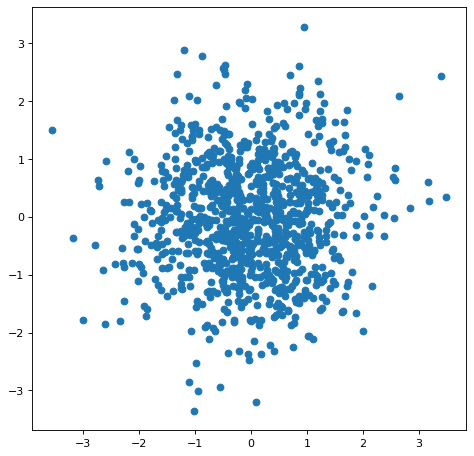

In [19]:
xx=np.random.normal(loc=0.0, scale=1.0, size=(1000,2))
x=xx[:,0]
y=xx[:,1]
plt.figure(figsize=(7,7), dpi= 80)
plt.scatter(x,y)

Such data may then be useful in estimating a count of the number of individuals in a group. For example, if a visual check  of a crowd of people taken by a drone estimates that individuals are normally distributed, but are too densely packed in the centre of the group to easily be counted, the number of people contained in a band some distance from the centre can be counted, and then an estimate made of the total group size. 

**2. Exponential** distributions relate to situations where the amount of change of a characteristic increases or decreases at an ever greater rate the further one moves from a point of origin. The probability density function (how values are distributed) for this is given by :  
$f(x,\beta) = \frac{1}{\beta}e^\frac{-x}{\beta}$ for x>=0, and 0 for x<0  
$\beta$ is known as the 'scale', and equals the mean value of the distribution.  
(ref https://en.wikipedia.org/wiki/Exponential_distribution)
Such a distribution might be used when modelling, for example, the number of people leaving a football ground after a match, or a concert when it finishes, to help plan public transport options.  This function takes two parameters, 'size' and 'scale'.  
'size' specifies the number of values to return, and can be a multidimensional array. eg np.random.exponential(size=5) returns 5 values, and np.random.exponential(size=(2,3)) returns a 2x3 matrix of values.  
eg :

In [48]:
print(np.random.exponential(size=(4)))
print("---------------------------------------------")
print(np.random.exponential(size=(2,5)))

[0.589206   0.67463621 0.8675493  0.84340887]
---------------------------------------------
[[2.7932802  1.67047836 0.24422739 1.93758312 0.05058838]
 [1.2299016  0.97128207 1.79295812 0.38883583 0.14069643]]


'scale' is the inverse of the rate of change - the higher the value of 'scale' the less steep the rate of change. Example histogram plots illustrate the influence that 'scale' has on the distribution of values. Note the difference in the x-axis values in the two plots below:   
(ref https://dfrieds.com/math/exponential-distribution)

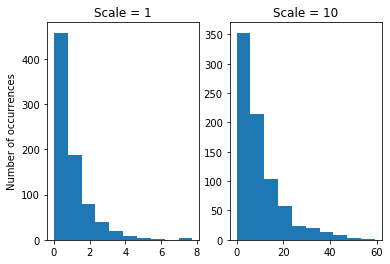

In [39]:
x = list(np.random.exponential(scale=1, size=800))
y = list(np.random.exponential(scale=10,size=800))
plt.subplot(1,2,1)
plt.ylabel('Number of occurrences')
plt.hist(x)
plt.title('Scale = 1')
plt.subplot(1,2,2)
plt.hist(y)
plt.title('Scale = 10')
plt.show()

**3. standard_t** distribution is used in situations where there is a small sample size, or the variance is unknown (ref https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-distribution/), and it is assumed that the sample comes from a Normal distribution (ref https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.standard_t.html#numpy.random.standard_t). It has the same shape as a Normal distribution, a bell shaped curve, but with values slightly more spread out from the mean. It tests whether or not the mean of the sample is a good estimate of the actual mean. As the sample size increaeses this distribution tends towards the Normal distribution. Example plots illustrate this :

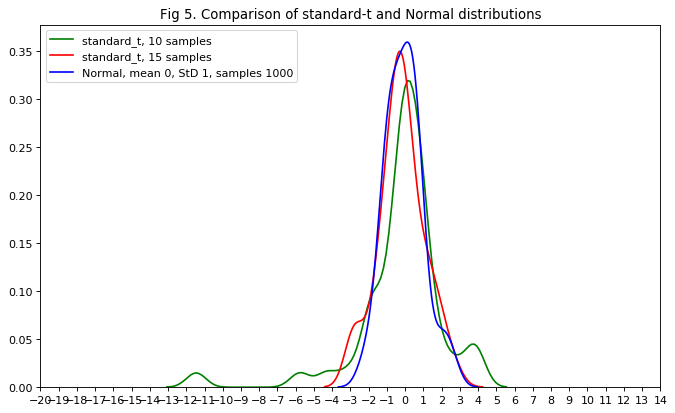

In [65]:
x=np.random.standard_t(df=2,size=50)
y=np.random.standard_t(df=5,size=50)
z=np.random.normal(loc=0, scale=1.0, size=50)
plt.figure(figsize=(10,6), dpi= 80)
sns.kdeplot(x, color="g", label="standard_t, 10 samples")
sns.kdeplot(y, color="r", label="standard_t, 15 samples")
sns.kdeplot(z, color="b", label="Normal, mean 0, StD 1, samples 1000")

# Decoration
plt.title('Fig 5. Comparison of standard-t and Normal distributions')
plt.xticks(np.arange(-20, 15, 1.0))
plt.legend()
plt.show()

**4. Poisson** distribution, describes the probability that a given number of occurences of an event will happen in a fixed interval, if the mean number of occurences per interval is known, but the gap between individual events is random. Each new occurence is independent of previous ones, and no two events are concurrent. This is a discrete rather than continuous distribution. 
(ref https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459)  
It is described by the equation : $P(X)=\frac{e^{-\mu}\mu^x}{x!}$  where P(X) is the probability of a number of events occuring in a given interval, $\mu$ is the mean number per interval, and x is 0, 1, 2, 3, ...  
(ref https://www.intmath.com/counting-probability/13-poisson-probability-distribution.php)  
'interval' can also apply to an area of space, as well as a time period.
The random.poisson function has two parameters - the expectation interval ('lam') and the size ('size). The expectation interval is the mean of the expected number of values occuring within an interval (or an array of values). The size is the size of the output, as a multi dimensional array. For example,  

In [89]:
print(np.random.poisson(lam=5,size=10))

[12  4  3  3  2  5  9  3  5  7]


Here, the mean of the expected number of events occuring within an interval is 5, and values have been generated for 10 intervals. The mean can be a floating point value, but the outputs will always be integers >=0. eg

In [91]:
print(np.random.poisson(lam=12.5,size=20))

[13 17  6 12 21 11 10  8 20 16  8 24  8 16 16 14 15 10 11 18]


Fig 6 below illustrates the shape of the Poisson distribution, for an example with a mean of 20 occurences per interval, over 1000 intervals.

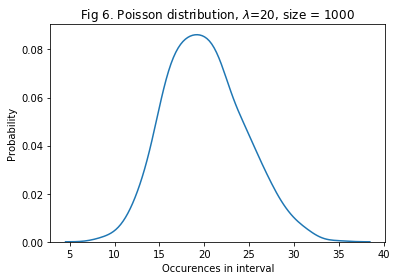

In [94]:
x=np.random.poisson(lam=20,size=1000)
sns.kdeplot(x)
# Decoration
plt.xlabel('Occurences in interval')
plt.ylabel('Probability')
plt.title('Fig 6. Poisson distribution, $\lambda$=20, size = 1000')
plt.show()

An example of it's use might be if a factory has a large number of machines and the owner wants to know how many breakdowns might be expected in any given week, so a contract can be drawn up with a repair company, allowing for a given maximum number of visits per week. If the average number of breakdowns was say 20, as in Fig 6, the owner may decide that as the probability of more than 29 occuring is roughly less than 0.01 (from the plot), ie just under once every two year on average, that that is an acceptable risk. For the risk of failure of vital parts on a plane a much lower probability would be acceptable.  

An example of generating two dimensional outputs is :

In [95]:
print(np.random.poisson(lam=(5,10),size=(10,2)))

[[ 2  9]
 [10 10]
 [ 2 12]
 [ 6 13]
 [ 5 13]
 [ 6  9]
 [ 7  8]
 [ 5 10]
 [ 2  7]
 [ 5 14]]


Here we have two columns of 10 values, with the expected mean of the first column being 5, and of the second column being 10.

**5. geometric** distribution, models how many events must occur to achieve a success in situations where the outcome of each event is either success or failure, where events are independent, and where the probability of success is the same for each event. 
(ref https://docs.scipy.org/doc/numpy1.14.0/reference/generated/numpy.random.geometric.html#numpy.random.geometric)  
This is described by : $f(k)=(1-p)^{k-1}p$  where 'p' is the probability of success of a single trial, and 'k' is the number of failures that occur before the first success.  
The random.geometric function has two parameters, the probability of success for each event (or an array of probabilities) and the size of the output array. Examples are :

In [102]:
print(np.random.geometric(0.5,10))
print('---------------------')
print(np.random.geometric((0.3,0.7),(10,2)))

[1 1 4 3 7 1 3 6 1 1]
---------------------
[[5 1]
 [2 1]
 [2 2]
 [2 1]
 [4 1]
 [6 1]
 [2 1]
 [2 3]
 [2 2]
 [2 2]]


The first output above gives the number of events required until success occurs from a random selection of 10 samples, when the probability of success for any one event is 0.5. The second output is similar for two lots of 10 samples, with the probability of success for individual events in the first column being 0.3, and 0.7 for the second column.  
There are many practical applications where it is useful to know how many events must occur before success (or failure) is likely to be achieved. For example, if a car manufacturer is buying parts from a supplier and the supplier guarantees a failure rate of 1 per thousand in the first 3 years, the manufacturer might compare the actual rate of failure (which affects warranty costs and reputation) for batches of 1000 cars, with random samples generated using the supposed failure rate, to see if the suppliers figures are reasonable. 

In [107]:
print(np.random.geometric(0.001,1000))

[1439 2171 1560  509 1102 1676  760  352  350  529 2808 1049  564  252
 1154  205 1327 2409  488 1056 1292   49  273  350   39 1611  179  627
    8  791  340 1851  442   25  411 1434  515  786  609  206  378  476
  737  279    9  582   66  248  269  199  553  180 1062  317  108 2277
  502 3127 1470  194 1425   23  289 1839  165  142  993 4445   58 1715
  596  443  358 2065  512   43  186 1098 3034  296  597 1057  682   75
 2062  487  360  231  770  787   95   88  844 1298   47  190 1325 1295
 1089 1631 3425 1446 1618 1096 1351  285  154   29   50 2185 3893  681
   58  752  156   47 1746 1757  266  151 2491 1153  163 1590  124  881
   73  158  397  447  607  818  564 1533  489 4012 2945  470 1098 1271
  343  260  210  607  142 1094   98  337  113  159  662  141 2934  207
 1113  897  424   77 1041 1604 1551  541 1313 1795  658 1938  840   52
 1881 1783   72  435  103 1044  324 2512 1518  635  696 2106 2670  151
  401   12  759 1250 1554   27  458 1277 1545  190 2035  294  352  286
   84 

## Part 4 The use of seeds

The random number generator used by numpy.random is called the Mersenne Twister. It is beyond the scope of this document to describe the algorithm used by this generator, but it is given in Wikipedia - https://en.wikipedia.org/wiki/Mersenne_Twister  
The first function in the algorithm initialises the generator from a seed. As mentioned earlier, this then determines the subsequent outputs.  
If 624 consecutive outputs are obtained, it is possible to then predict future outputs  
(ref https://jazzy.id.au/2010/09/22/cracking_random_number_generators_part_3.html)

To demonstrate use of the seed, generate a single number twice, first without specifying the seed, and then using the same seed :

In [31]:
# Generate 2 numbers without using 'seed'
print(np.random.rand())
print(np.random.rand())
# Now set the seed to a specific value, and generate two more numbers
np.random.seed(2)
print(np.random.rand())
np.random.seed(2)
print(np.random.rand())

0.4117464389724873
0.63084266314589
0.43599490214200376
0.43599490214200376


As can be seen, the 3rd and 4th values are the same, whereas the first 2, with different seeds, are not (probably - if seed selection is random there is a very small probability the same seed could be selected twice in succession. You would need to know details of the seed selection criteria to determine this probability, and it is possible the selection deliberately prevents using the same seed twice, although that would reduce the overall level of randomness of the process).